## Lab1
### Questions we can use the data to explore:

REMOVE CELL BEFORE TURN IN

1.Within DFW airport which airline has the most on time or early flights or worst delays?
    *could pick a few states or airport destinations
    
2.When is the best time to fly/What time of day has the worst delays at DFW?

### Columns we should keep from the dataset

REMOVE CELL BEFORE TURN IN
* dayname
* flightdate
* airline
* origin
* dst
* depdelay
* depdelaygroup
* dtimeblk
* distgroup


# Business Understanding

This data set is from The Department of Transportation’s Bureau of Transportation Statistics regarding the On Time Preformance of domestic flights flying from the DFW airport from January to March of this year.

According to the Airports Council International, DFW is the 12th busiest airport in the world, serving around 67 million passangers a year. When booking flights for a trip, there are often many differnt airlines and times of day to choose from. The end goal of analyis on our dataset is to be able to understand for DFW when is the best time to fly and with what airline in order to minimize departure delays when taking a trip.

# Who would benefit
Businesses who send employees on businesss trips and people taking personal trips flying through DFW would benefit from this analysis. If a flight for a business trip gets delayed or cancelled, the company loses money as hours of the client or employee's time are wasted as a result. Additionally, many people get a very limited time for vacation and personal trips. A long delay or cancellation can and casue them to lose valuable time at their destination or with their families.

Using this analysis a person or company can try to schedule thier flights to minimize likelihood of experiencing delays when flying from DFW. If a person has to fly during a time or with an airline with a high likelihood of delay or cancellation, they can use this analysis to help them plan accordingly and be sure to build in flexibility due to delays when planning thier schedules.

Airlines that fly from DFW could also use this analysis to help them see how they stack up to thier competitors and to help them better schedule thier employees. For example, during times when there is a high likelihood of delay they could have more gate and travel agent staff available.

# Model Performance
In order to be considered useful our model would have to perform........ **I think we should save this until the end so we can see how much variance there is in the things we are trying to predict.. our model should probably be between 75-99% accurate.. if there is little variance our model should probably be closer to 99% if there is larger variance our model can probably be farthur away(b/c we cant account for events like weather)

# Data Understanding

#### Data Set

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

import pandas as pd
import numpy as np

df = pd.read_csv('https://s2.smu.edu/~tyienger/aaaa-On_Time_On_Time_Performance_2018_1.csv') # read in the csv file
ddf = df
print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

Pandas: 0.23.4
Numpy: 1.13.1


In [41]:
#Filter data by needed airport
df_dallas = df[df.Origin == 'DFW']
print (df_dallas.describe())
print (df_dallas.count())

          Year  Quarter         Month    DayofMonth     DayOfWeek  \
count  66085.0  66085.0  66085.000000  66085.000000  66085.000000   
mean    2018.0      1.0      2.013876     15.509556      3.898994   
std        0.0      0.0      0.830702      8.725352      1.973865   
min     2018.0      1.0      1.000000      1.000000      1.000000   
25%     2018.0      1.0      1.000000      8.000000      2.000000   
50%     2018.0      1.0      2.000000     16.000000      4.000000   
75%     2018.0      1.0      3.000000     23.000000      6.000000   
max     2018.0      1.0      3.000000     31.000000      7.000000   

          FlightNum  OriginAirportID  DestAirportID      DepDelay  \
count  66085.000000          66085.0   66085.000000  64716.000000   
mean    2694.560959          11298.0   12867.713763      8.766209   
std     1605.094463              0.0    1585.291240     39.092864   
min        5.000000          11298.0   10136.000000    -22.000000   
25%     1427.000000          1129

### Data Attributes

In [42]:
#Remove attributes that are not useful for us
for col in ['Year','Quarter','Month','monthname','DayofMonth','DayOfWeek','TailNum','FlightNum','OriginAirportID',
           'OriginCityName','OriginState','OriginStateName','DestAirportID','DestCityName','DestState','DestStateName','CRSDepTime',
           'DepDelayMinutes','TaxiIn','TaxiOut','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes','ArrDelayGroup','ATimeBlk','CancellationReason',
            'Diverted', 'AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','FirstDepTime1','FirstDepTime2',
            'FirstDepTime','TotalAddGTime','LongestAddGTime','DivAirportLandings','DivReachedDest','DivActualElapsedTime','DivArrDelay','DivDistance',
           'CRSElapsedTime','Flights','Cancelled']:
    if col in df_dallas:
        del df_dallas[col]

In [43]:
print(df_dallas.dtypes)


dayname               object
FlightDate            object
airline               object
Origin                object
Dest                  object
DepTime               object
DepDelay             float64
DepDelayGroup         object
DTimeBlk              object
ActualElapsedTime    float64
Distance             float64
DistGroup             object
dtype: object


In [44]:
print(df_dallas.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66085 entries, 1160 to 1702659
Data columns (total 12 columns):
dayname              66085 non-null object
FlightDate           66085 non-null object
airline              66085 non-null object
Origin               66085 non-null object
Dest                 66085 non-null object
DepTime              64736 non-null object
DepDelay             64716 non-null float64
DepDelayGroup        64716 non-null object
DTimeBlk             66085 non-null object
ActualElapsedTime    64516 non-null float64
Distance             66085 non-null float64
DistGroup            66085 non-null object
dtypes: float64(3), object(9)
memory usage: 6.6+ MB
None


#### Explanation

The data we are focusing on is mainly flight delay time data so we chose to keep the colums of:
* dayname (the day of the week of the flight) -----------------------> ordinal
* airline (the airline of the flight)--------------------------------> nominal
* Origin (origin airport code of the flight)-------------------------> nominal
* Dest (destination airport code of the flight)----------------------> nominal
* DepTime (departure time of the flight)-----------------------------> ratio
* DepDelay (delay of the flight departure in minutes)----------------> interval
* DepDelayGroup (delay of the flight departure grouped by minutes)---> ordinal
* DTimeBlk (delay of the flight grouped by hours)--------------------> ordinal
* ActualElapsedTime (flight time in the air)-------------------------> ratio
* Distance (distance the flight travelled)---------------------------> interval
* DistGroup (distance the flight travelled grouped by miles----------> ordinal


#### Missing Data

In [45]:
#Figure out what data is missing
df_dallas.isnull().sum()

dayname                 0
FlightDate              0
airline                 0
Origin                  0
Dest                    0
DepTime              1349
DepDelay             1369
DepDelayGroup        1369
DTimeBlk                0
ActualElapsedTime    1569
Distance                0
DistGroup               0
dtype: int64

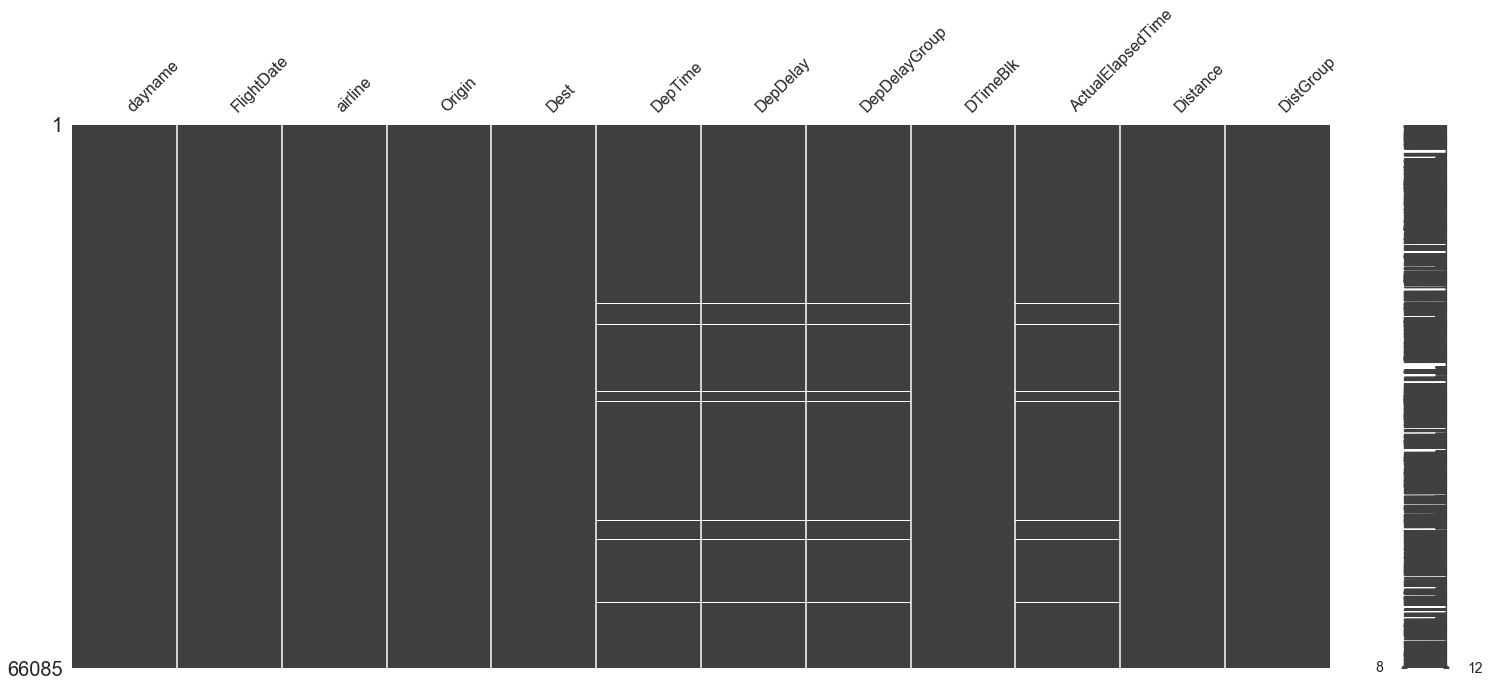

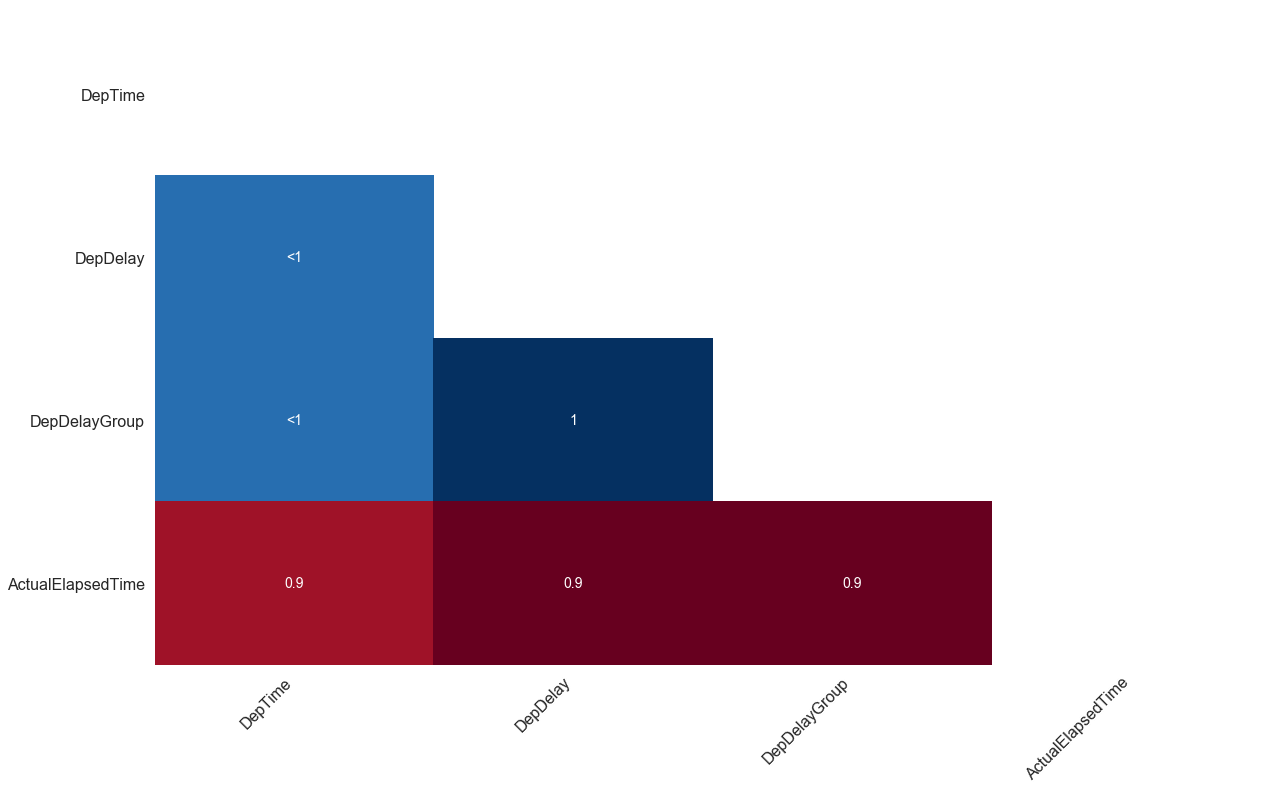

In [46]:
# Allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn 

mn.matrix(df_dallas.sort_values(by=['Dest']))
mn.heatmap(df_dallas.sort_values(by=['Dest']))

In [47]:
#Group data by destination 
df_dallas_grouped = df_dallas.groupby(by=['Dest'])
#Show the number of unique destinations
print ("The number of unique destinations from DFW is: ", df_dallas.Dest.nunique())
print()
#Show the number of flights to each destination
df_dallas_grouped.count().sort_values(by=['DepDelay'],ascending=False)

The number of unique destinations from DFW is:  155



,dayname,FlightDate,airline,Origin,DepTime,DepDelay,DepDelayGroup,DTimeBlk,ActualElapsedTime,Distance,DistGroup
Dest,,,,,,,,,,,
ORD,1828,1828,1828,1828,1811,1811,1811,1828,1810,1828,1828
ATL,1660,1660,1660,1660,1648,1648,1648,1660,1645,1660,1660
LAX,1587,1587,1587,1587,1580,1580,1580,1587,1577,1587,1587
IAH,1455,1455,1455,1455,1420,1420,1420,1455,1416,1455,1455
DEN,1384,1384,1384,1384,1377,1377,1377,1384,1376,1384,1384
LGA,1446,1446,1446,1446,1370,1370,1370,1446,1365,1446,1446
LAS,1134,1134,1134,1134,1132,1132,1132,1134,1130,1134,1134
SFO,1103,1103,1103,1103,1094,1094,1094,1103,1092,1103,1103
PHX,1093,1093,1093,1093,1084,1085,1085,1093,1085,1093,1093


In [48]:
#Remove the missing data
#Need to re-slice the DFW airport data from the dataframe
df_dallas.dropna(inplace=True)
df_dallas.count()

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


dayname              64491
FlightDate           64491
airline              64491
Origin               64491
Dest                 64491
DepTime              64491
DepDelay             64491
DepDelayGroup        64491
DTimeBlk             64491
ActualElapsedTime    64491
Distance             64491
DistGroup            64491
dtype: int64

#### Explanation
The missing data for the actual elapsed time was removed from the data set. This is because if the data for actual elapsed time was missing, the data for departure delay time and departure delay group was also missing. As a result of this it is unwise to impute values for the data, as their is no reasonable value to base the delay time off of. This is because all of the other attributes that have values have nothing to do with the delay time. For example, a compairison of a flight with the same airline, on the same date, to the same city shows that their is a large range of delays for different flights. This is because delay time can be affected by a myriad of factors such as mechanical factors, weather related factors, crew related factors, and due to the fact that a plane does not just magically appear in an airport but travels from a different destination where it could have also been affected by delays. Due to this, it makes no sense to try to impute the data for the missing values. See the two charts below for an example.

In [49]:
df_dallas_atl = df_dallas[df_dallas.Dest == 'ATL']
df_dallas_atl_sorted = df_dallas_atl.sort_values(by=['FlightDate','airline'], ascending = True)
df_dallas_atl_sorted.head(10)

,dayname,FlightDate,airline,Origin,Dest,DepTime,DepDelay,DepDelayGroup,DTimeBlk,ActualElapsedTime,Distance,DistGroup
63464,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,10:52,26.0,Delay between 15 to 29 minutes,10:00AM to 10:59AM,116.0,731.0,500-749 Miles
118971,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,18:39,4.0,Delay between 0 and 14 minutes,6:00PM to 6:59PM,119.0,731.0,500-749 Miles
137546,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,08:49,-6.0,Delay between -15 and -1 minutes,8:00AM to 8:59AM,116.0,731.0,500-749 Miles
138049,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,20:54,-1.0,Delay between -15 and -1 minutes,8:00PM to 8:59PM,117.0,731.0,500-749 Miles
404231,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,16:42,-3.0,Delay between -15 and -1 minutes,4:00PM to 4:59PM,119.0,731.0,500-749 Miles
412730,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,14:45,15.0,Delay between 15 to 29 minutes,2:00PM to 2:59PM,121.0,731.0,500-749 Miles
431566,Monday,2018-01-01,American Airlines Inc.,DFW,ATL,13:27,32.0,Delay between 30 to 44 minutes,12:00PM to 12:59PM,106.0,731.0,500-749 Miles
928297,Monday,2018-01-01,Delta Air Lines Inc.,DFW,ATL,16:14,14.0,Delay between 0 and 14 minutes,4:00PM to 4:59PM,120.0,731.0,500-749 Miles
937089,Monday,2018-01-01,Delta Air Lines Inc.,DFW,ATL,09:32,-3.0,Delay between -15 and -1 minutes,9:00AM to 9:59AM,107.0,731.0,500-749 Miles
937500,Monday,2018-01-01,Delta Air Lines Inc.,DFW,ATL,12:32,32.0,Delay between 30 to 44 minutes,12:00PM to 12:59PM,111.0,731.0,500-749 Miles


In [50]:
df_dallas_atl_sorted.DepDelay.describe()

count    1645.000000
mean        8.865046
std        40.949527
min       -15.000000
25%        -5.000000
50%        -2.000000
75%         5.000000
max       486.000000
Name: DepDelay, dtype: float64

# Data Visualizations

## General Visualizations for DFW

In [51]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

print('Seaborn:', sns. __version__)
# now try plotting some of the previous plots, way more visually appealing!!

Seaborn: 0.9.0


### Departure Delay by Airline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

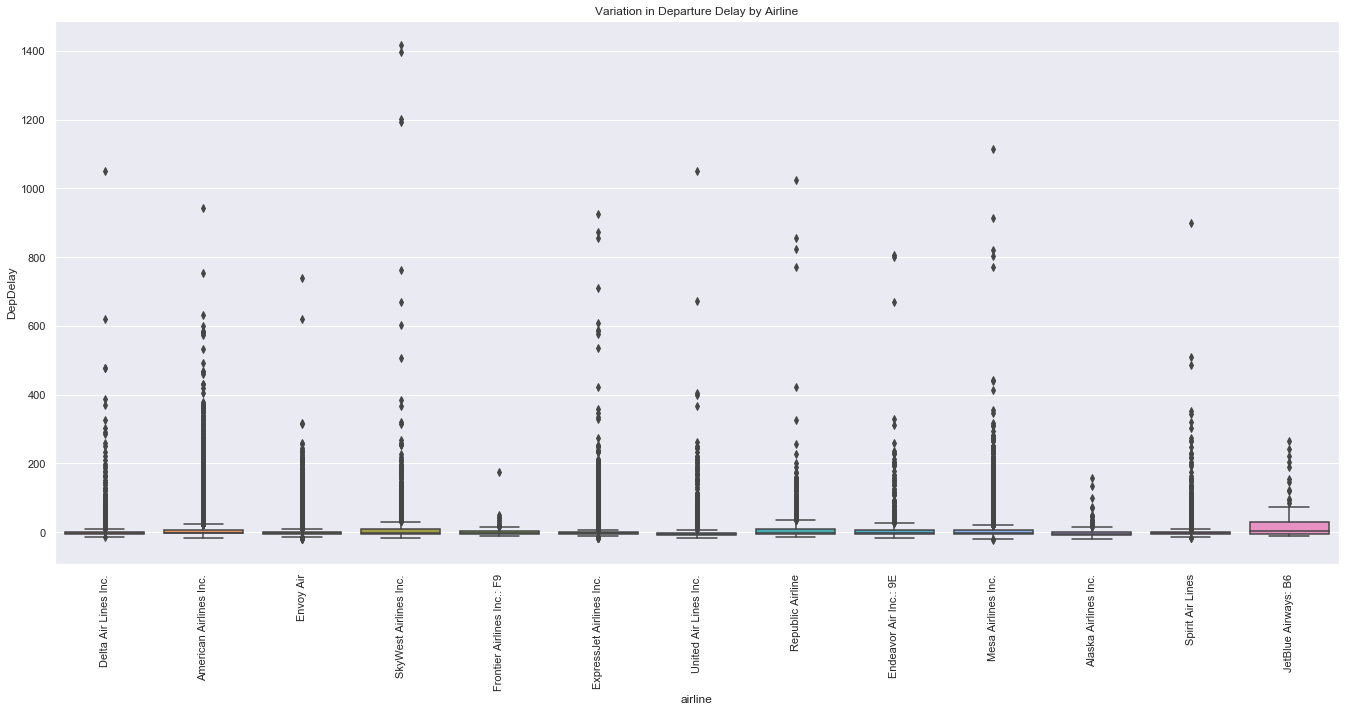

In [52]:
fig = plt.figure(figsize=(23,10))
sns.boxplot(x="airline", y="DepDelay", data=df_dallas)
plt.title('Variation in Departure Delay by Airline')
plt.xticks(rotation='vertical')

### Explanation
This boxplot shows that there is a lot of variation in the departure delays for all of the airlines flying out of DFW. While the average delays are genrally pretty close, you can see the realtive distribution of all of the outliers. This clearly shows that some airlines namely SkyWest, Mesa or American have more and larger 
outliers than any other airline, this indicates that the delays for these airlines can be more costly for the traveler compared to their counter parts.

### Average Departure Delay

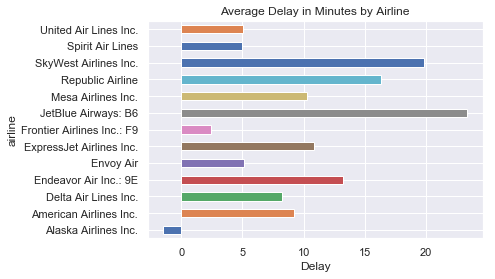

In [53]:
df_dallas_air = df_dallas.groupby(by=['airline'])
df_dallas_air.DepDelay.describe().sort_values(by=['mean'],ascending=True)
# caculate average delay for each airline
average_delay = df_dallas_air.DepDelay.mean() 

# show in a bar chart using builtin pandas API
ax = average_delay.plot(kind='barh')
plt.title('Average Delay in Minutes by Airline')
plt.xlabel('Delay')
plt.show()

### Explanation:
For the DFW airport the average departure delay was the lowest for Alaska Airlines, reaching into the negative numbers indicating that that on average the flights from Alaska Airlines were abe to depart from their gate before their scheduled time. In contrast, the average departure dealy was the greatest for JetBlue Airlines with the average delay being well over twenty minutes indicating that the average JetBlue flight from Dallas suffers from substantial delays. Additionally all of the other airlines, except SkyWest, tend to average between 5 and 15 minutes of delays which is important to consider when deciding which airline to fly.

### Flight Distance

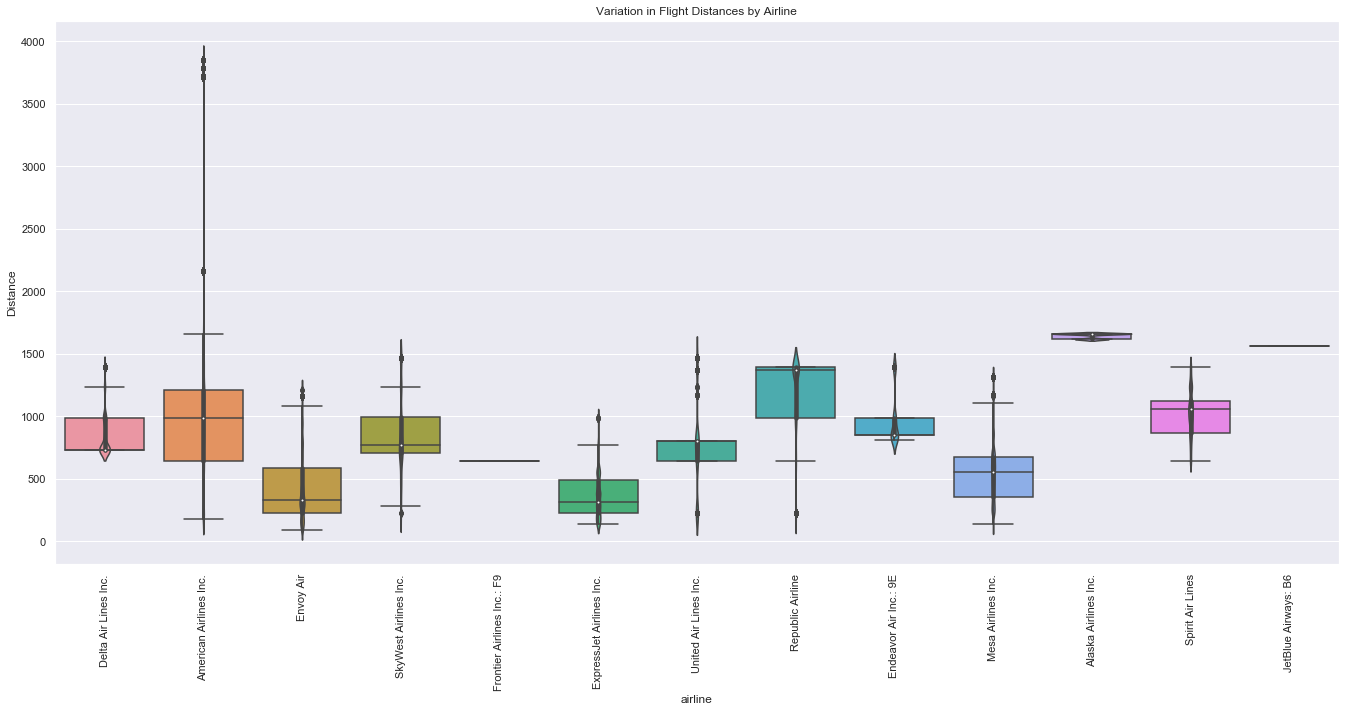

In [54]:
fig = plt.figure(figsize=(23,10))
sns.boxplot(x="airline", y="Distance", data=df_dallas)
plt.xticks(rotation='vertical')


sns.violinplot(x="airline", y="Distance", data=df_dallas)
plt.title('Variation in Flight Distances by Airline')



### Explanation
Airlines like Frontier, Alaska, and JetBlue all have smaller boxplots, indicating that they only fly for a narrow range of distances. In contrast, the larger boxplot for flight distance of American airlines indicates that American flies to a greater variety of destinations than all of the other airlines. This is important because it shows that not every airlines from DFW flies to the same airport and that some destinations may have a limited choice in airlines and subsequently little control over the average delay thet they may face.

### Delay by Distance

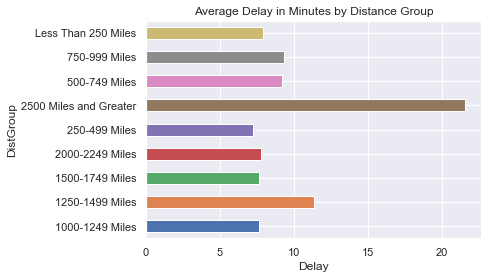

In [55]:
df_dallas_distgroup = df_dallas.groupby(by=['DistGroup'])
df_dallas_distgroup.DepDelay.describe().sort_values(by=['mean'],ascending=True)
# caculate average delay for each airline
average_delay = df_dallas_distgroup.DepDelay.mean() 

# show in a bar chart using builtin pandas API
ax = average_delay.plot(kind='barh')
plt.title('Average Delay in Minutes by Distance Group')
plt.xlabel('Delay')
plt.show()

### Explanation
This chart shows that the average delay in minutes is largest for flight traveling 2500+ miles or 1250-1499 miles and smallest for 250-499miles. These figures can help travelers estimate the amount of expected delay to factor into their trip depending on the flight distance.

## Day of Week

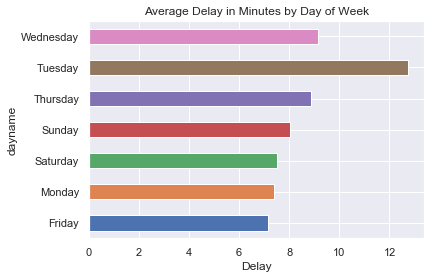

In [56]:
df_dallas_dayofweek = df_dallas.groupby(by=['dayname'])
df_dallas_dayofweek.DepDelay.describe().sort_values(by=['mean'],ascending=True)
# caculate average delay for each airline
average_delay = df_dallas_dayofweek.DepDelay.mean() 

# show in a bar chart using builtin pandas API
ax = average_delay.plot(kind='barh')
plt.title('Average Delay in Minutes by Day of Week')
plt.xlabel('Delay')
plt.show()

### Explanation
This chart shows that the average delay in minutes is largest on Tuesday, making it the worst day to fly in regards to delays. These figures can help travelers pick the best day to fly or to estimate the amount of expected delay to factor into their trip depending on the day.

## Data Relationships by Airport (Atlanta Airport (ATL) Chicago Airport (ORD))
These visualizations cover relationships within specific flight routes for the destinations with the most flights. DFW -> ATL and DFW -> ORD. This data could be taken for any destination from DFW.

### Departure Delay by Airport

In [57]:
#Atlanta
df_dallas_atl_sorted.DepDelay.describe()

count    1645.000000
mean        8.865046
std        40.949527
min       -15.000000
25%        -5.000000
50%        -2.000000
75%         5.000000
max       486.000000
Name: DepDelay, dtype: float64

In [58]:
#Chicago
df_dallas_chi = df_dallas[df_dallas.Dest == 'ORD']
df_dallas_chi_sorted = df_dallas_chi.sort_values(by=['FlightDate','airline'], ascending = True)
df_dallas_chi_sorted.DepDelay.describe()

count    1810.000000
mean        7.871823
std        41.692922
min       -17.000000
25%        -6.000000
50%        -2.000000
75%         5.000000
max      1051.000000
Name: DepDelay, dtype: float64

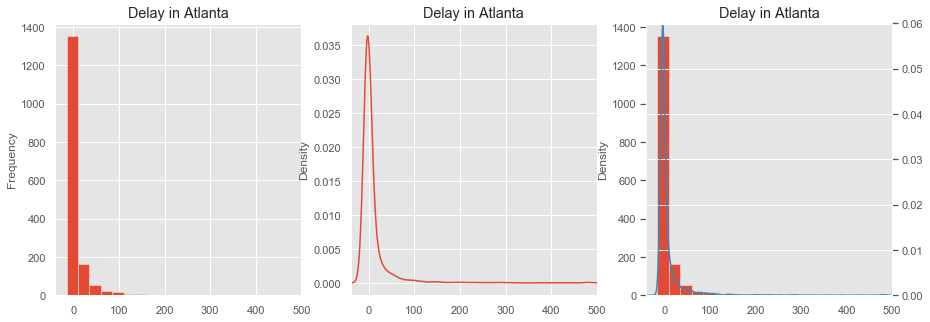

In [59]:
#Atlanta
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df_dallas_atl_sorted.DepDelay.plot.hist(bins=20)
plt.xlim(-40,500)
plt.title("Delay in Atlanta")

plt.subplot(1,3,2)
df_dallas_atl_sorted.DepDelay.plot.kde(bw_method=0.2)
plt.xlim(-40,500)
plt.title("Delay in Atlanta")

plt.subplot(1,3,3)
df_dallas_atl_sorted.DepDelay.plot.hist(bins=20, )
df_dallas_atl_sorted.DepDelay.plot.kde(bw_method=0.1, secondary_y=True)
plt.ylim(0,0.06)
plt.xlim(-40,500)
plt.title("Delay in Atlanta")

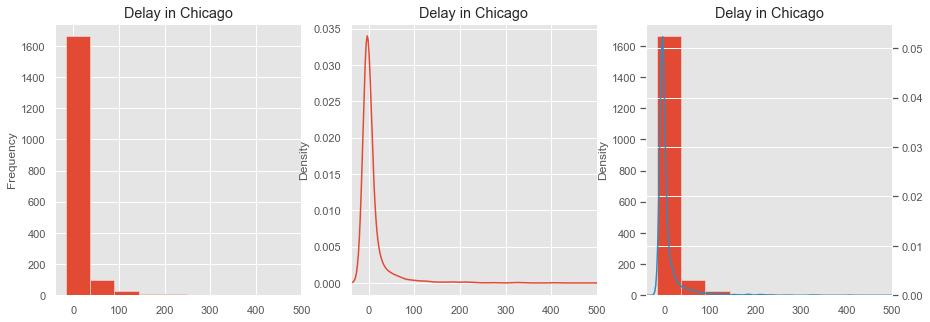

In [60]:
#Chicago
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df_dallas_chi_sorted.DepDelay.plot.hist(bins=20)
plt.xlim(-40,500)
plt.title("Delay in Chicago")

plt.subplot(1,3,2)
df_dallas_chi_sorted.DepDelay.plot.kde(bw_method=0.2)
plt.xlim(-40,500)
plt.title("Delay in Chicago")

plt.subplot(1,3,3)
df_dallas_chi_sorted.DepDelay.plot.hist(bins=20, )
df_dallas_chi_sorted.DepDelay.plot.kde(bw_method=0.1, secondary_y=True)
plt.ylim(0,0.055)
plt.xlim(-40,500)
plt.title("Delay in Chicago")
plt.show()

#### Explanation

For two distinct airports, likly differing weather and traffic patterns, Atlanta and Chicago experience very similar delay times and variations. Between these two airports, destination is probably not a strong factor affecting flight delays.

### Departure Delay by Airline

In [61]:
# DepDelay by airline Atlanta
df_dallas_atl_grouped = df_dallas_atl_sorted.groupby(by=['airline'])
df_dallas_atl_grouped.DepDelay.describe().sort_values(by=['mean'],ascending=True)

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Spirit Air Lines,89.0,7.516854,58.416240,-10.0,-6.0,-4.0,0.0,486.0
American Airlines Inc.,681.0,8.875184,33.604980,-8.0,-4.0,-1.0,7.0,431.0
Delta Air Lines Inc.,875.0,8.994286,43.951957,-15.0,-5.0,-3.0,3.0,478.0


In [62]:
# DepDelay by airline Chicago
df_dallas_chi_grouped = df_dallas_chi_sorted.groupby(by=['airline'])
df_dallas_chi_grouped.DepDelay.describe().sort_values(by=['mean'],ascending=True)

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Republic Airline,15.0,-4.733333,5.921711,-11.0,-7.5,-6.0,-4.5,15.0
SkyWest Airlines Inc.,14.0,-2.642857,8.837047,-10.0,-8.0,-6.0,-1.5,21.0
Spirit Air Lines,90.0,2.055556,35.528549,-11.0,-6.0,-3.0,-2.0,319.0
United Air Lines Inc.,604.0,6.539735,57.507286,-17.0,-8.0,-6.0,-2.0,1051.0
American Airlines Inc.,1087.0,9.402944,30.736292,-14.0,-3.0,0.0,8.0,337.0


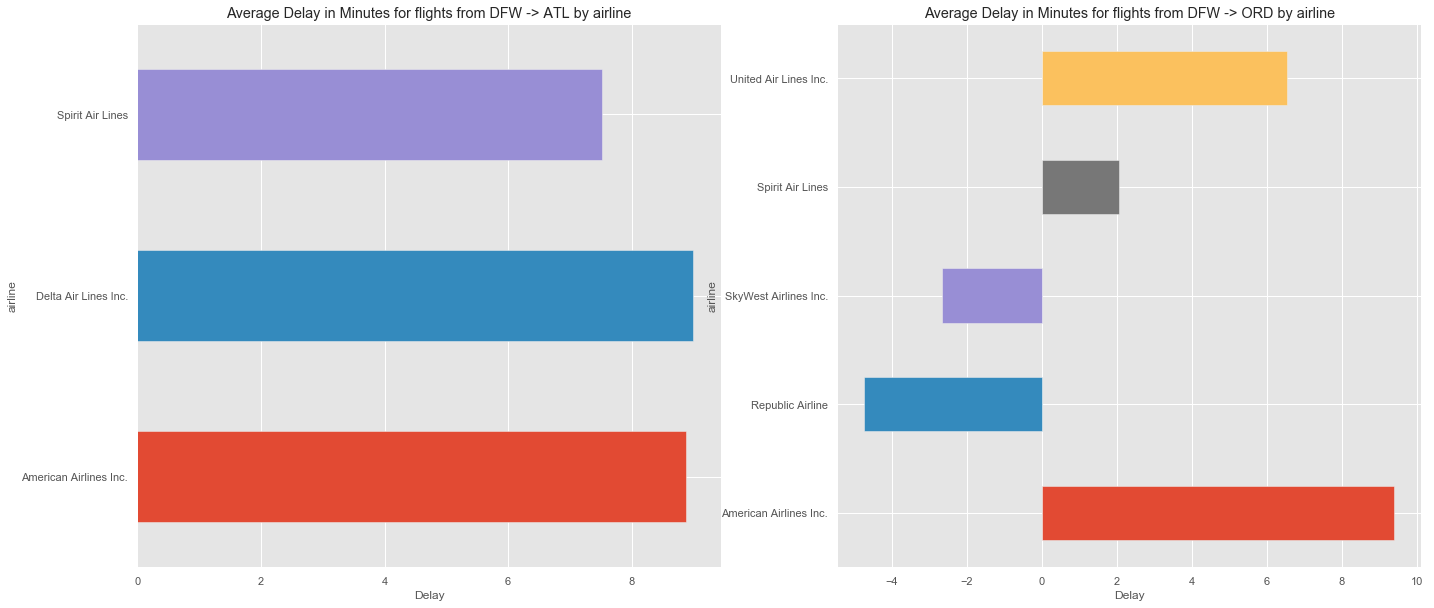

In [63]:
plt.style.use('ggplot')

# caculate average delay for each airline
average_delay_atl = df_dallas_atl_grouped.DepDelay.mean() 
average_delay_chi = df_dallas_chi_grouped.DepDelay.mean() 

fig = plt.figure(figsize=(23,10))

plt.subplot(1,2,1)
average_delay_atl.plot(kind='barh')
plt.title('Average Delay in Minutes for flights from DFW -> ATL by airline')
plt.xlabel('Delay')

plt.subplot(1,2,2)
bx = average_delay_chi.plot(kind='barh')
plt.title('Average Delay in Minutes for flights from DFW -> ORD by airline')
plt.xlabel('Delay')
plt.show()

#### Explanation

The average delay time was compared to varing airlines to see if any airlines were consistently delayed. While flying to ATL, Delta airlines had the most flights and the highest average delay time. However, American Airlines was close behind in both flights and average delay. When flying to ORD, once again, the airlines that had the most flights also had the highest average of delays. Furthermore, the smaller airlines even had a negative average delay, meaning they arrived early, on average. From these tables and graphs we expected to see which airline were usually delayed and it shows that despite the airline, an increase in the amounts of flights correlates strongly with an increase in the average delay time. 

### Departure Delay by Time

In [64]:
#DepDelay by time of Day ATL
df_dallas_atl_time = df_dallas_atl_sorted.groupby(by=['DTimeBlk'])
df_dallas_atl_time.DepDelay.describe().sort_values(by=['mean'],ascending=True)

,count,mean,std,min,25%,50%,75%,max
DTimeBlk,,,,,,,,
9:00AM to 9:59AM,76.0,2.644737,14.828535,-10.0,-4.0,-3.0,2.00,76.0
6:00AM to 6:59AM,208.0,4.423077,41.448808,-10.0,-5.0,-3.0,-0.75,486.0
12:00AM to 5:59AM,42.0,4.666667,37.073866,-9.0,-4.0,-3.0,0.00,234.0
7:00AM to 7:59AM,77.0,4.753247,41.197584,-9.0,-6.0,-5.0,-2.00,285.0
2:00PM to 2:59PM,143.0,5.216783,27.422141,-11.0,-5.0,-2.0,4.00,275.0
8:00PM to 8:59PM,88.0,7.454545,29.769192,-8.0,-4.0,-2.0,6.00,201.0
11:00AM to 11:59AM,54.0,8.796296,48.185326,-12.0,-5.0,-3.5,0.00,325.0
10:00AM to 10:59AM,124.0,9.153226,38.863540,-11.0,-4.0,0.0,6.00,362.0
4:00PM to 4:59PM,174.0,10.034483,40.774000,-8.0,-4.0,-2.0,6.00,431.0


In [65]:
#DepDelay by time of Day Chicago
df_dallas_chi_time = df_dallas_chi_sorted.groupby(by=['DTimeBlk'])
df_dallas_chi_time.DepDelay.describe().sort_values(by=['mean'],ascending=True)

,count,mean,std,min,25%,50%,75%,max
DTimeBlk,,,,,,,,
11:00PM to 11:59PM,1.0,-4.000000,NaN,-4.0,-4.0,-4.0,-4.00,-4.0
6:00AM to 6:59AM,23.0,-1.173913,19.756822,-14.0,-9.5,-8.0,-6.50,66.0
12:00AM to 5:59AM,139.0,1.474820,36.066430,-17.0,-6.0,-4.0,-1.00,406.0
8:00AM to 8:59AM,88.0,3.011364,20.170249,-8.0,-4.0,-2.0,1.00,120.0
7:00AM to 7:59AM,230.0,3.795652,38.795815,-14.0,-6.0,-4.0,-2.00,337.0
10:00AM to 10:59AM,175.0,4.605714,29.955119,-15.0,-7.0,-4.0,4.50,263.0
5:00PM to 5:59PM,87.0,5.356322,33.009504,-17.0,-8.0,-6.0,-3.00,154.0
9:00AM to 9:59AM,90.0,6.011111,29.065016,-9.0,-4.0,-2.0,2.00,212.0
10:00PM to 10:59PM,75.0,6.146667,25.977482,-9.0,-5.0,-3.0,5.00,137.0


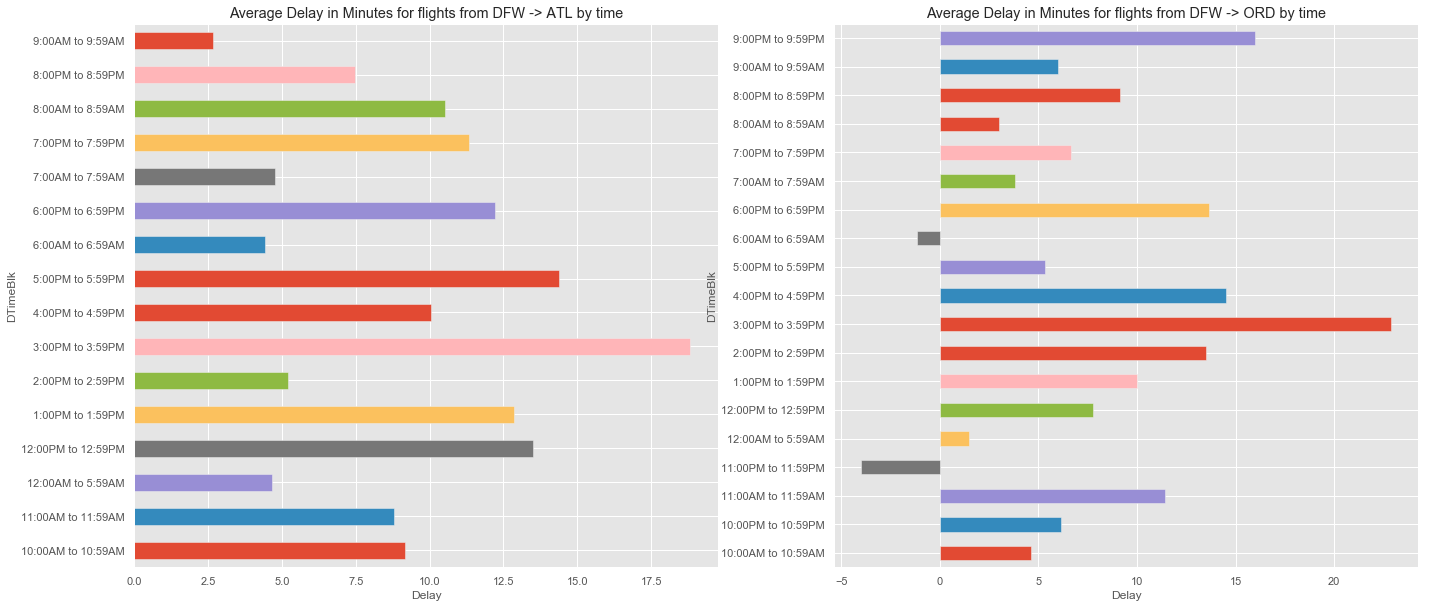

In [66]:
plt.style.use('ggplot')

# caculate average delay for each airline
average_delay_atl = df_dallas_atl_time.DepDelay.mean() 
average_delay_chi = df_dallas_chi_time.DepDelay.mean() 

fig = plt.figure(figsize=(23,10))

plt.subplot(1,2,1)
ax = average_delay_atl.plot(kind='barh')
plt.title('Average Delay in Minutes for flights from DFW -> ATL by time')
plt.xlabel('Delay')

plt.subplot(1,2,2)
ax = average_delay_chi.plot(kind='barh')
plt.title('Average Delay in Minutes for flights from DFW -> ORD by time')
plt.xlabel('Delay')
plt.show()

#### Explanation

These graphs and tables show the average delay by departure time. The times that have the largest delays for both Chicago and Atlanta depart in the afternoon. Flying out of Atlanta in the morning appears to have less average delays but Chicago does not seem to have that trend. Planes departing to Chicago have a chance of leaving earlier than intended. From this we can conclude that time may have a slight influence on delays but may not be a main factor.

### Departure Delay by Day of the Week

In [67]:
#Atlanta
df_dallas_atl_day = df_dallas_atl_sorted.groupby(by=['dayname'])
df_dallas_atl_day.DepDelay.describe().sort_values(by=['mean'],ascending=True)

,count,mean,std,min,25%,50%,75%,max
dayname,,,,,,,,
Friday,258.0,5.593023,40.187414,-15.0,-4.00,-2.0,1.00,478.0
Sunday,209.0,5.822967,29.688159,-12.0,-5.00,-2.0,2.00,229.0
Monday,252.0,6.246032,30.104251,-11.0,-4.25,-2.0,5.00,285.0
Saturday,188.0,6.484043,39.377574,-10.0,-5.00,-3.0,1.00,362.0
Thursday,259.0,6.965251,23.173652,-9.0,-4.00,-2.0,6.00,145.0
Tuesday,241.0,14.033195,56.995019,-12.0,-5.00,-2.0,8.00,477.0
Wednesday,238.0,16.571429,54.104458,-12.0,-4.75,-1.5,11.75,486.0


In [68]:
#Chicago
df_dallas_chi_day = df_dallas_chi_sorted.groupby(by=['dayname'])
df_dallas_chi_day.DepDelay.describe().sort_values(by=['mean'],ascending=True)

,count,mean,std,min,25%,50%,75%,max
dayname,,,,,,,,
Saturday,197.0,2.289340,17.576147,-13.0,-6.0,-3.0,1.0,129.0
Sunday,259.0,6.281853,26.993283,-16.0,-6.0,-2.0,6.0,218.0
Wednesday,271.0,6.605166,30.447207,-17.0,-6.0,-3.0,4.0,263.0
Thursday,272.0,7.154412,36.971592,-15.0,-6.0,-2.0,5.0,406.0
Monday,265.0,9.392453,36.217733,-14.0,-5.0,-1.0,6.0,326.0
Tuesday,263.0,10.832700,42.929671,-17.0,-7.0,-3.0,6.0,337.0
Friday,283.0,10.939929,71.290485,-14.0,-6.0,-2.0,3.0,1051.0


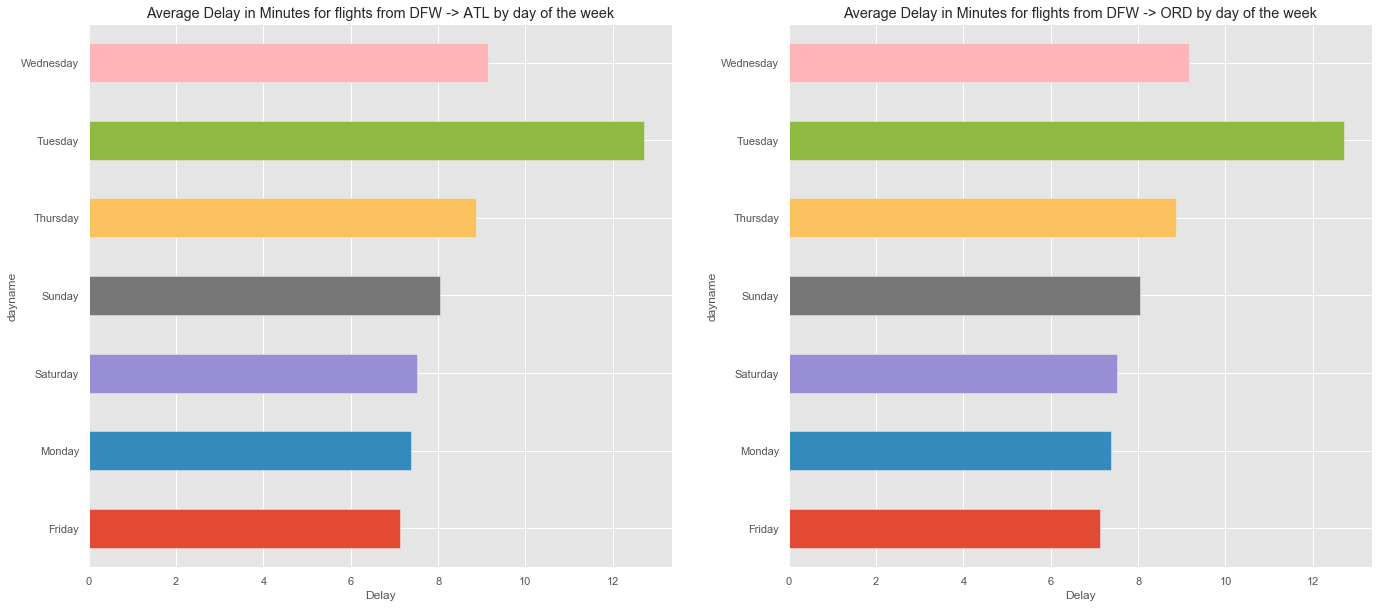

In [69]:
plt.style.use('ggplot')

# caculate average delay for each day of the week
average_delay_atl = df_dallas_atl_day.DepDelay.mean() 
average_delay_chi = df_dallas_chi_day.DepDelay.mean() 

fig = plt.figure(figsize=(23,10))

plt.subplot(1,2,1)
ax = average_delay.plot(kind='barh')
plt.title('Average Delay in Minutes for flights from DFW -> ATL by day of the week')
plt.xlabel('Delay')

plt.subplot(1,2,2)
ax = average_delay.plot(kind='barh')
plt.title('Average Delay in Minutes for flights from DFW -> ORD by day of the week')
plt.xlabel('Delay')
plt.show()

### Explanation
The graphs and tables above display the average delays by day of week for both Atlanta and Chicago. Across destinations ATL and ORD, Wednesday and Tuesday have the largest average delay time, followed by the average delay times of the rest of the days in descending order. While the two graphs make look the same, the average delay time for flying to Atlanta is higher than that of flying to Chicago; however, the number of flights to Chicago is greater than Atlanta. This shows that flying on certain days of the week have a direct correlation to having delays.

## Flight Time by Airline

In [70]:
#Atlanta
df_dallas_atl_flight_time = df_dallas_atl_sorted.groupby(by=['airline'])
df_dallas_atl_flight_time.ActualElapsedTime.describe().sort_values(by=['mean'],ascending=True)

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Spirit Air Lines,89.0,118.719101,10.642954,102.0,113.0,116.0,121.0,156.0
Delta Air Lines Inc.,875.0,119.253714,10.803512,102.0,113.0,118.0,123.0,204.0
American Airlines Inc.,681.0,120.540382,11.221509,104.0,114.0,119.0,124.0,237.0


In [71]:
#Chicago
df_dallas_chi_flight_time = df_dallas_chi_sorted.groupby(by=['airline'])
df_dallas_chi_flight_time.ActualElapsedTime.describe().sort_values(by=['mean'],ascending=True)

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Republic Airline,15.0,130.866667,9.006876,110.0,126.50,131.0,134.00,146.0
United Air Lines Inc.,604.0,134.889073,12.121659,106.0,127.00,134.0,141.00,211.0
American Airlines Inc.,1087.0,136.898804,13.645703,107.0,129.00,135.0,143.00,251.0
Spirit Air Lines,90.0,137.366667,11.616967,117.0,129.25,135.5,143.75,177.0
SkyWest Airlines Inc.,14.0,142.142857,11.889602,124.0,135.00,140.5,149.00,170.0


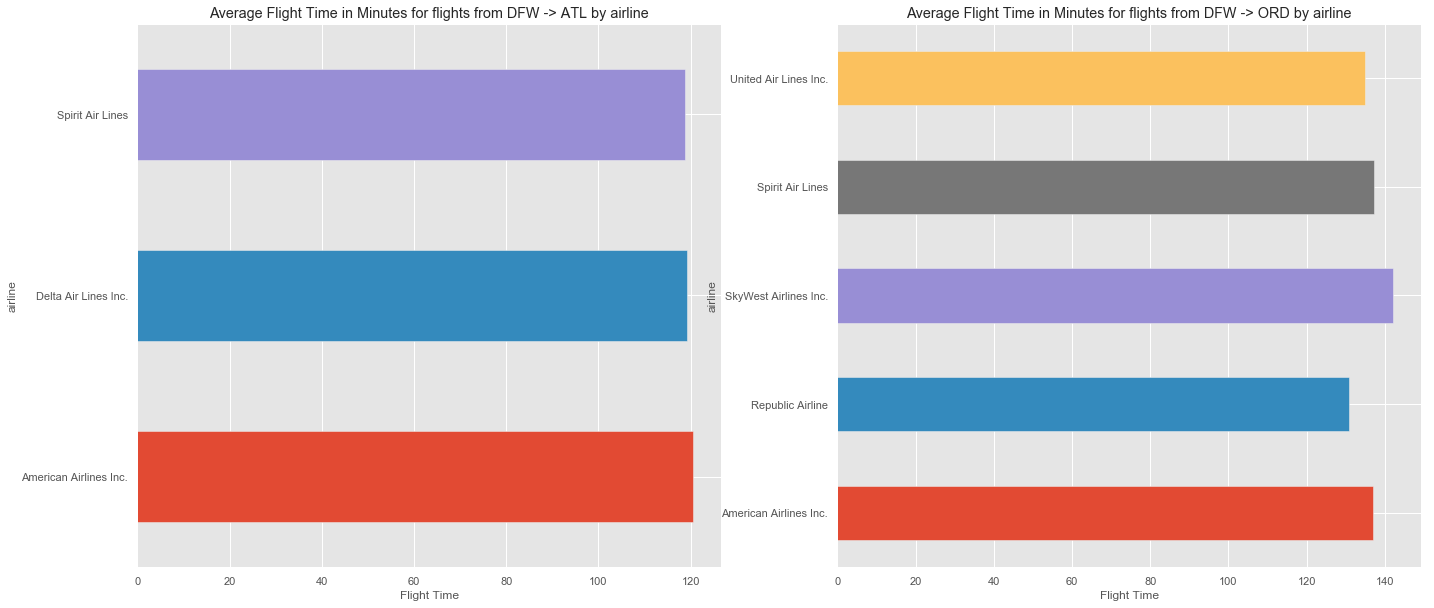

In [72]:
plt.style.use('ggplot')

# calculate flight time for each airline
flight_time_atl = df_dallas_atl_flight_time.ActualElapsedTime.mean() 
flight_time_chi = df_dallas_chi_flight_time.ActualElapsedTime.mean() 

fig = plt.figure(figsize=(23,10))

plt.subplot(1,2,1)
ax = flight_time_atl.plot(kind='barh')
plt.title('Average Flight Time in Minutes for flights from DFW -> ATL by airline')
plt.xlabel('Flight Time')

plt.subplot(1,2,2)
ax = flight_time_chi.plot(kind='barh')
plt.title('Average Flight Time in Minutes for flights from DFW -> ORD by airline')
plt.xlabel('Flight Time')
plt.show()

### Explanation

Average flight times did not vary significantly between airlines with distinations to either of Atlanta or Chicago airports; however, it is interesting to note that Republic Airline averaged four minutes faster flight time than their next closest competitor. This may be due to the speed of their planes or policies leading to a prioritization of speed over fuel efficiency. Regardless, it is likely that customers would be pleased to arrive as early as possible and minimize flight time. 